<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  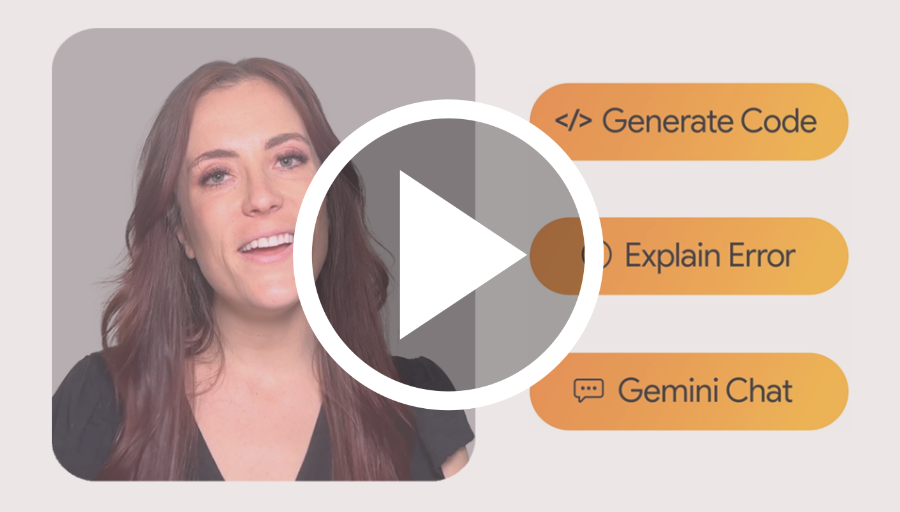
  </a>
</center>

In [3]:
!pip install chardet
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

# text data
import string
import re
import chardet

with open('Amazon_bestsellers.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('Amazon_bestsellers.csv', encoding=result['encoding'])


Seaborn verion 0.13.1


In [4]:
df['title_len'] = df['title'].apply(lambda x: len(str(x)) - str(x).count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    text=str(text)
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3) if (len(text) - text.count(" ")) > 0 else 0

# apply function
df['punc%'] = df['title'].apply(lambda x: count_punc(x))


list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:

# Option 1: Using isna() to check for NaN values in the 'genre' column
unknown_genre_books = df[df['genre'].isna()]['title']

# Option 2: If empty strings are used to represent unknown genres
unknown_genre_books = df[df['genre'].str.strip() == '']['title']

# Option 3: Combining both NaN and empty strings
unknown_genre_books = df[df['genre'].isna() | (df['genre'].str.strip() == '')]['title']

# Print the result
print(unknown_genre_books)


1258    The Screaming Goat (Book & Figure)
Name: title, dtype: object


<ipython-input-19-ecedb98ed92b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(g_count.index, fontsize=12)


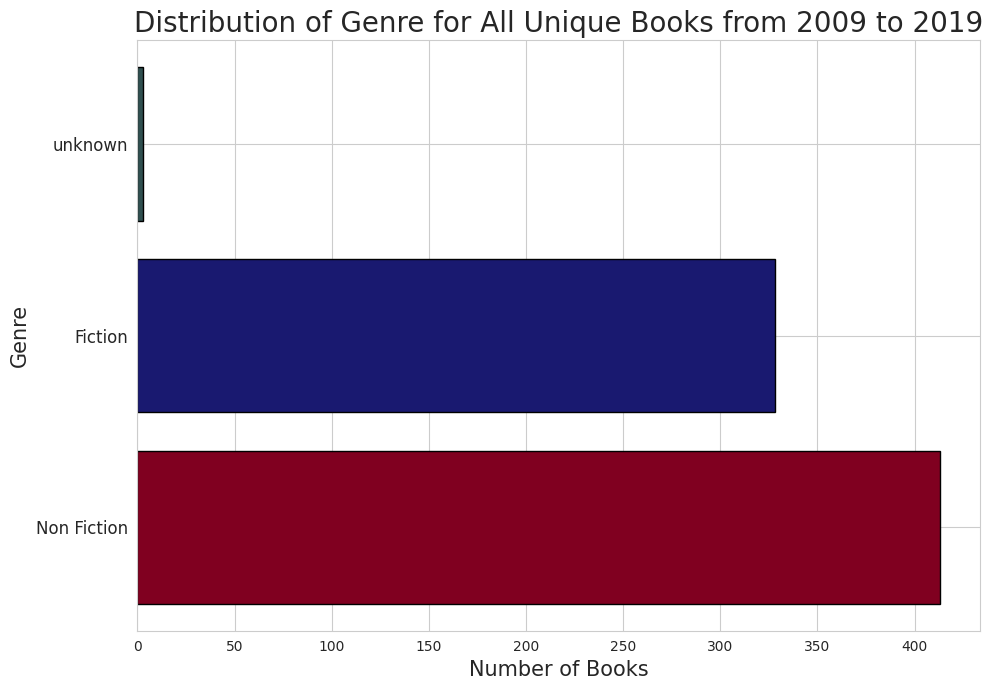

In [19]:
no_dup = df.drop_duplicates('title')
g_count = no_dup['genre'].value_counts()

# Dark color palette for the bar chart
genre_col = ['#800020','#191970','#2F4F4F']

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(g_count.index, g_count.values, color=genre_col, edgecolor='black')

# Adding title and labels
ax.set_title('Distribution of Genre for All Unique Books from 2009 to 2021', fontsize=20)
ax.set_xlabel('Number of Books', fontsize=15)
ax.set_ylabel('Genre', fontsize=15)

# Customizing the y-axis labels
ax.set_yticklabels(g_count.index, fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()


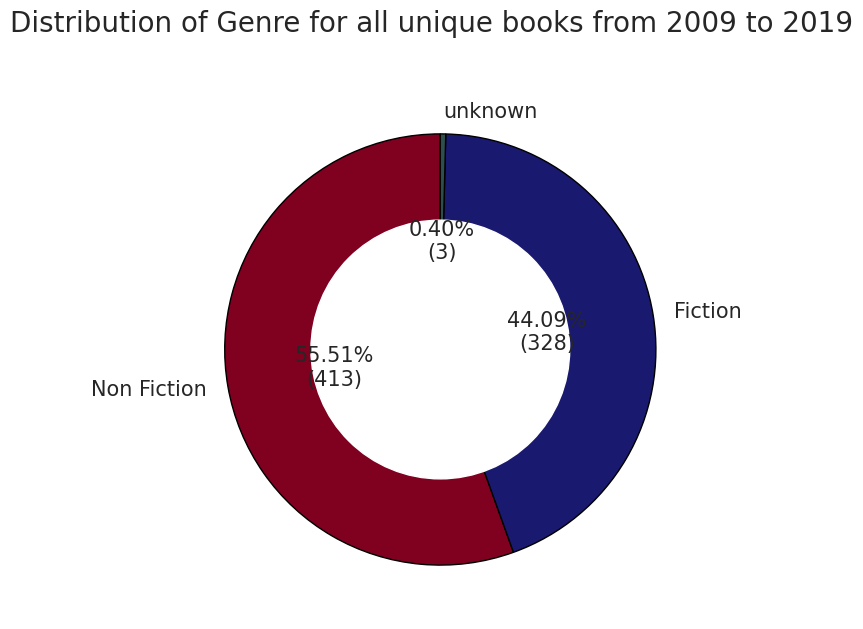

In [5]:
no_dup = df.drop_duplicates('title')
g_count = no_dup['genre'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct


genre_col = ['#800020','#191970','#228B22']

center_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col,wedgeprops={'edgecolor': 'black'})
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2021', fontsize=20)
fig.show()

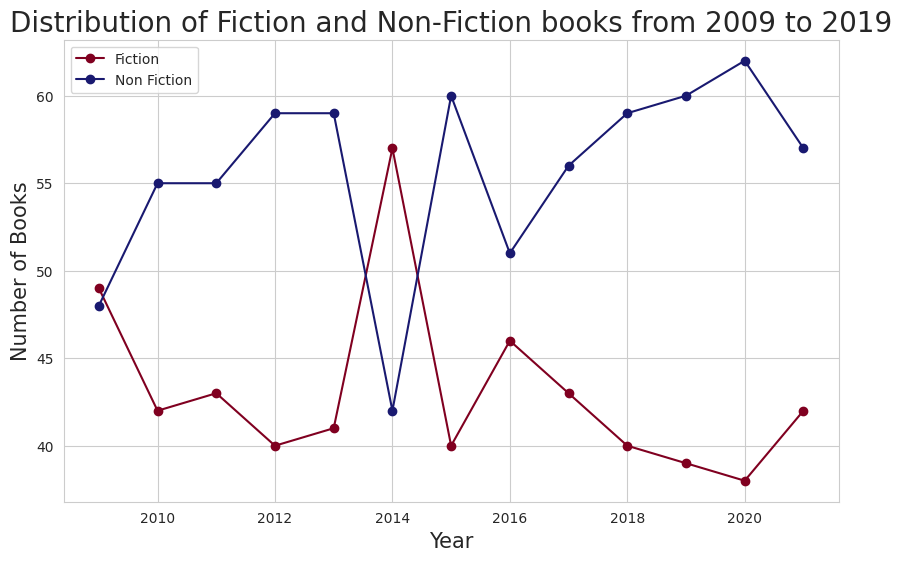

In [30]:
y1 = np.arange(2009, 2015)
y2 = np.arange(2015, 2022)
years = np.concatenate((y1, y2))

fiction_counts = []
non_fiction_counts = []


for year in years:
    counts = df[df['year'] == year]['genre'].value_counts()
    fiction_counts.append(counts.get('Fiction', 0))
    non_fiction_counts.append(counts.get('Non Fiction', 0))

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(years, fiction_counts, marker='o', linestyle='-', color='#800020', label='Fiction')
ax.plot(years, non_fiction_counts, marker='o', linestyle='-', color='#191970', label='Non Fiction')


# Adding labels and titles
ax.set_title('Distribution of Fiction and Non-Fiction books from 2009 to 2021', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Books', fontsize=15)
ax.legend()

# Show the plot
plt.show()


<ipython-input-8-e6dd1870cc46>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
<ipython-input-8-e6dd1870cc46>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


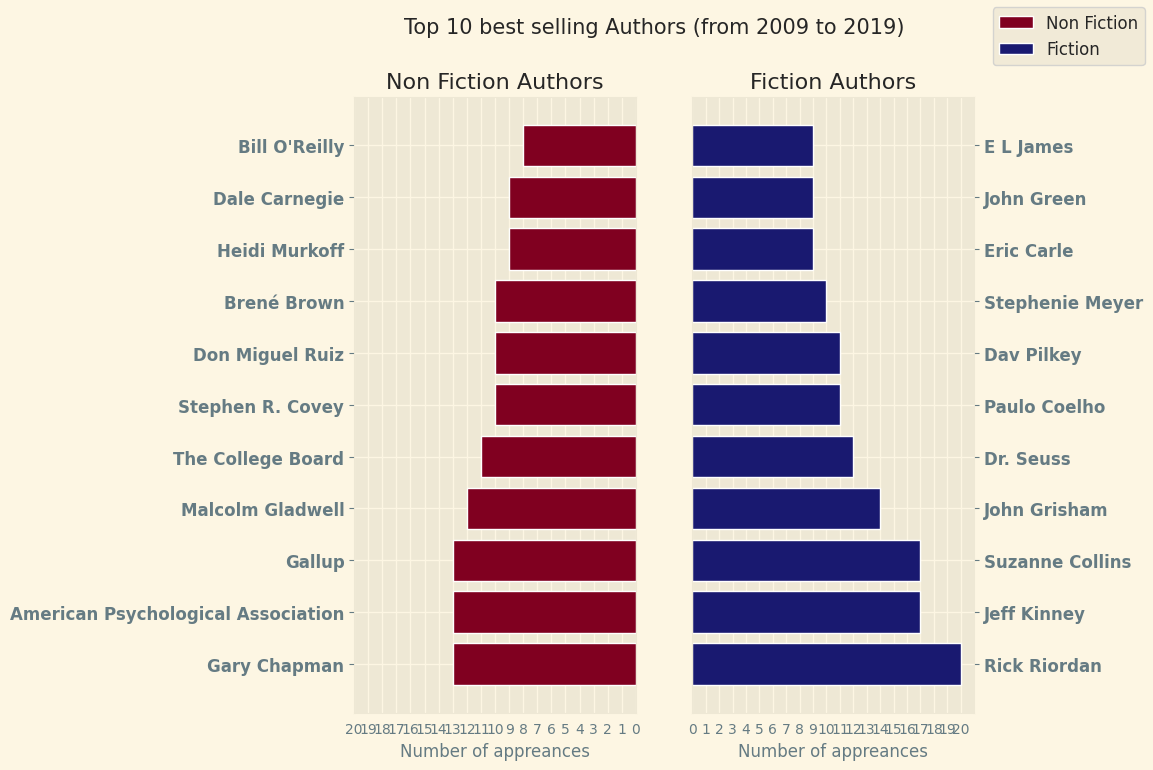

In [8]:
best_nf_authors = df.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['author', 'genre']).agg({'title': 'count'}).unstack()['title', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    if len(genre_col) < 2:
        genre_col=['#800020','#191970']
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')


    if len(genre_col) < 2:
        genre_col=(['#800020','#191970'])
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    plt.suptitle('Top 10 best selling Authorsfrom 2009 to 2021', fontsize=15)
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)

plt.show()

<ipython-input-9-05d473ad67eb>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


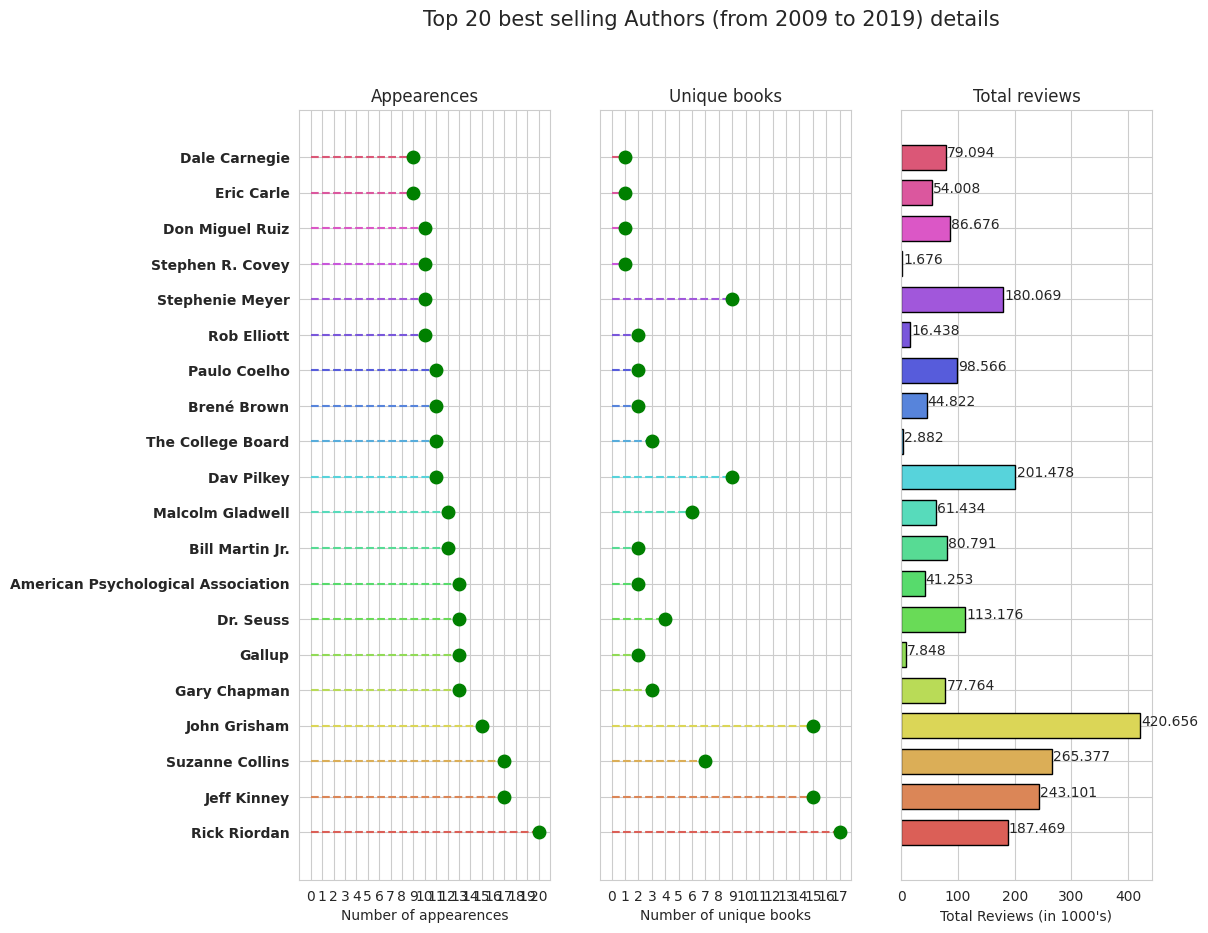

In [9]:
n_best = 20

top_authors = df.author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('title') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.author == name]['title']))
    total_reviews.append(no_dup[no_dup.author == name]['no_of_reviews'].str.replace(',', '').astype(float).sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.suptitle('Details of top 20 best selling Authors from 2009 to 2021 ', fontsize=15)
plt.show()

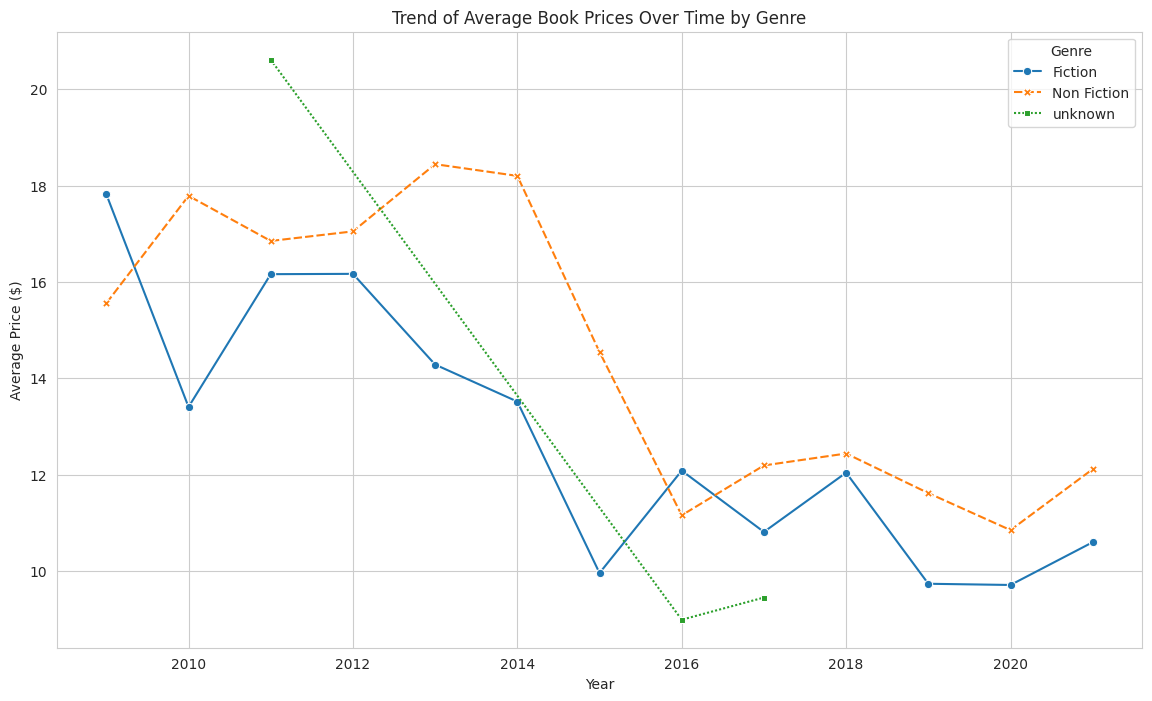

In [10]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'year' and 'genre', and calculate the average price
avg_price_by_genre = df.groupby(['year', 'genre'])['price'].mean().unstack()

# Plotting the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_price_by_genre, palette='tab10', markers=True)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.title('Trend of Average Book Prices Over Time by Genre')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

Correlation between Ratings and Number of Reviews: 0.17


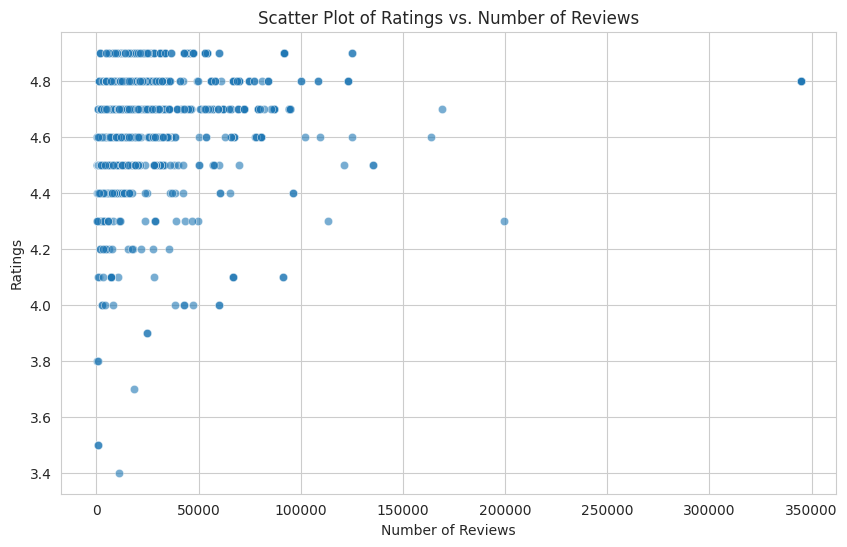

In [11]:
# Convert 'ratings' to numeric (remove any non-numeric characters and handle errors)
df['ratings'] = df['ratings'].replace('[\$,]', '', regex=True).astype(float)
# Convert 'no_of_reviews' to numeric (remove commas and convert to float)
df['no_of_reviews'] = df['no_of_reviews'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in 'ratings' or 'no_of_reviews'
df = df.dropna(subset=['ratings', 'no_of_reviews'])

# Calculate the correlation
correlation = df['ratings'].corr(df['no_of_reviews'])

# Print correlation
print(f'Correlation between Ratings and Number of Reviews: {correlation:.2f}')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='no_of_reviews', y='ratings', data=df, alpha=0.6)
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.title('Scatter Plot of Ratings vs. Number of Reviews')
plt.grid(True)
plt.show()

Distribution of Book Types:
cover_type
Hardcover                642
Paperback                528
Board book                80
Mass Market Paperback     29
Cards                      4
Spiral-bound               1
Printed Access Code        1
Pamphlet                   1
Name: count, dtype: int64


<ipython-input-12-8338a1f59aeb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=book_type_counts.index, y=book_type_counts.values, palette='inferno')


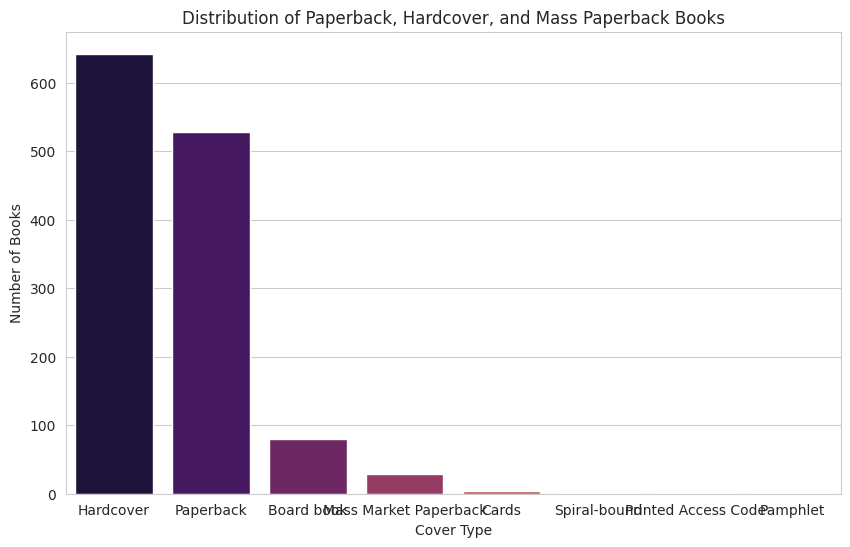


Average Price by Book Type:
cover_type
Board book                5.607875
Cards                     2.882500
Hardcover                15.123489
Mass Market Paperback    19.701034
Pamphlet                  1.500000
Paperback                12.960038
Printed Access Code      75.490000
Spiral-bound             35.300000
Name: price, dtype: float64


<ipython-input-12-8338a1f59aeb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='inferno')


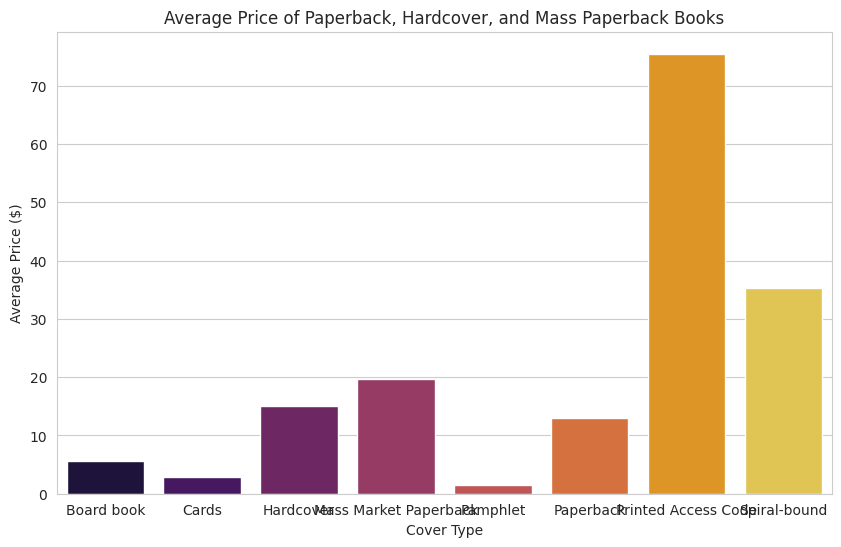


Genre Distribution by Book Type:
genre                  Fiction  Non Fiction  unknown
cover_type                                          
Board book                59.0         21.0      0.0
Cards                      1.0          3.0      0.0
Hardcover                287.0        354.0      1.0
Mass Market Paperback     25.0          4.0      0.0
Pamphlet                   0.0          1.0      0.0
Paperback                188.0        338.0      1.0
Printed Access Code        0.0          1.0      0.0
Spiral-bound               0.0          1.0      0.0


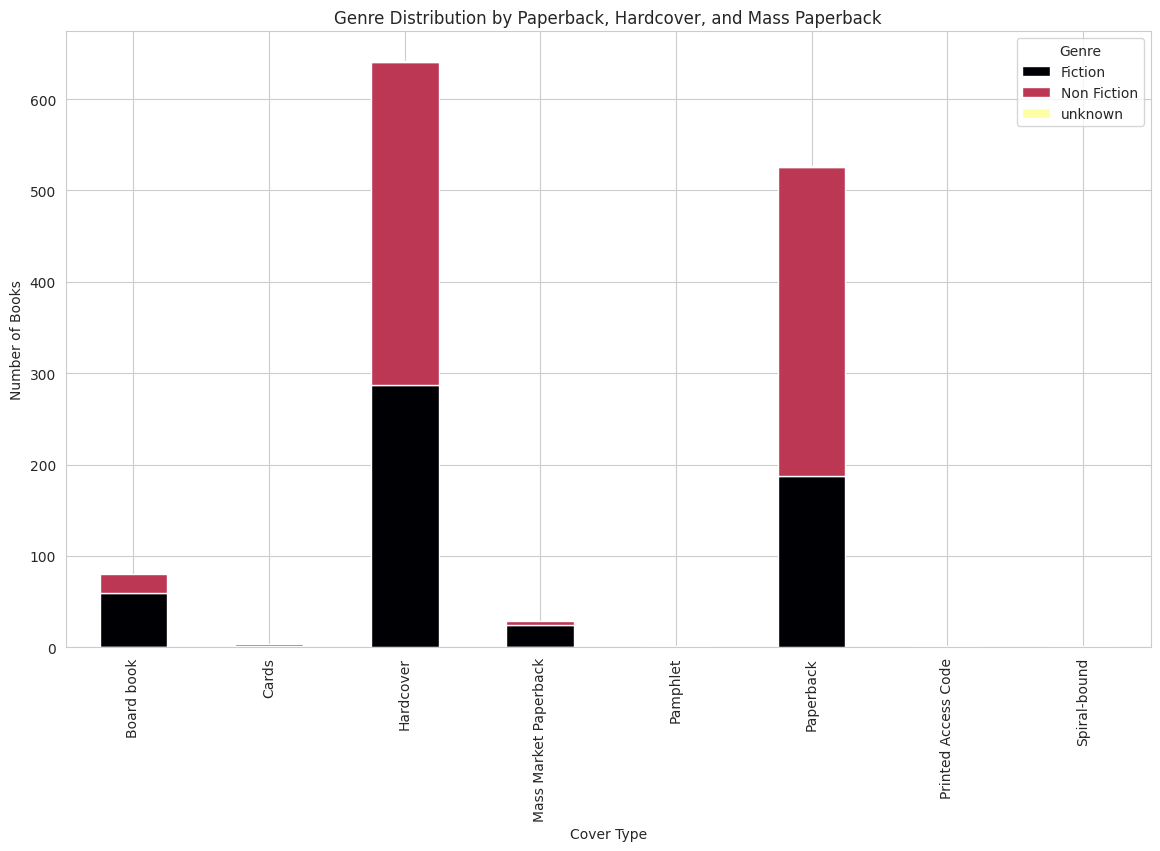

<Figure size 1400x800 with 0 Axes>

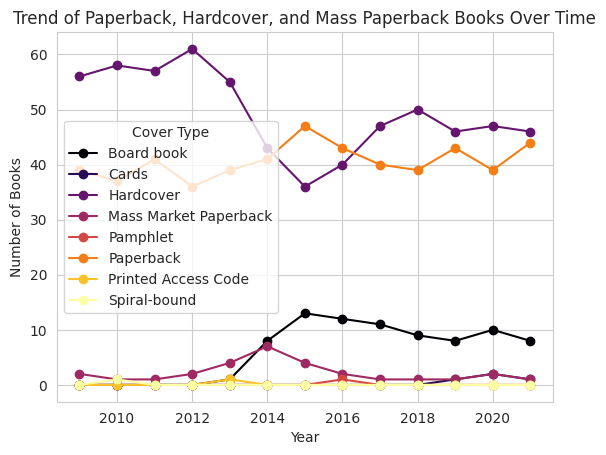

In [12]:
# Data Cleaning: Convert 'price' to numeric (remove any non-numeric characters if necessary)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# 1. Distribution of Book Types
book_type_counts = df['cover_type'].value_counts()
print("Distribution of Book Types:")
print(book_type_counts)

# Plot the distribution of book types
plt.figure(figsize=(10, 6))
sns.barplot(x=book_type_counts.index, y=book_type_counts.values, palette='inferno')
plt.xlabel('Cover Type')
plt.ylabel('Number of Books')
plt.title('Distribution of Paperback, Hardcover, and Mass Paperback Books')
plt.show()

# 2. Price Comparison
avg_price_by_type = df.groupby('cover_type')['price'].mean()
print("\nAverage Price by Book Type:")
print(avg_price_by_type)

# Plot average prices by book type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='inferno')
plt.xlabel('Cover Type')
plt.ylabel('Average Price ($)')
plt.title('Average Price of Paperback, Hardcover, and Mass Paperback Books')
plt.show()

# 3. Genre Distribution
genre_distribution = df.groupby('cover_type')['genre'].value_counts().unstack().fillna(0)
print("\nGenre Distribution by Book Type:")
print(genre_distribution)

# Plot genre distribution by book type
genre_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='inferno')
plt.xlabel('Cover Type')
plt.ylabel('Number of Books')
plt.title('Genre Distribution by Paperback, Hardcover, and Mass Paperback')
plt.legend(title='Genre')
plt.show()

# 4. Trend Over Time
# Convert 'year' to integer if not already
df['year'] = df['year'].astype(int)
yearly_distribution = df.groupby(['year', 'cover_type']).size().unstack().fillna(0)

# Plot trend over time
plt.figure(figsize=(14, 8))
yearly_distribution.plot(kind='line', marker='o', colormap='inferno')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('Trend of Paperback, Hardcover, and Mass Paperback Books Over Time')
plt.legend(title='Cover Type')
plt.grid(True)
plt.show()


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [13]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [14]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

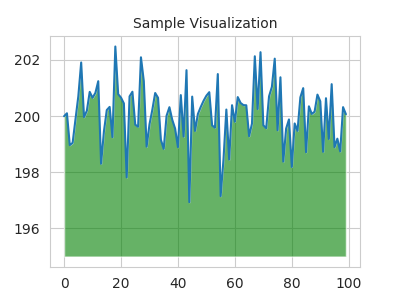

In [15]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
